In [1]:
import pybamm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
model = pybamm.lithium_ion.DFN()
param = pybamm.ParameterValues("Oehler2023")
var_pts = {"x_n": 5, "x_s": 20, "x_p": 5, "r_n": 50, "r_p": 50}
sim = pybamm.Simulation(model, parameter_values=param, var_pts=var_pts)

In [3]:
t_eval = np.linspace(0, 10000, 1000)
sol = sim.solve(t_eval=t_eval)

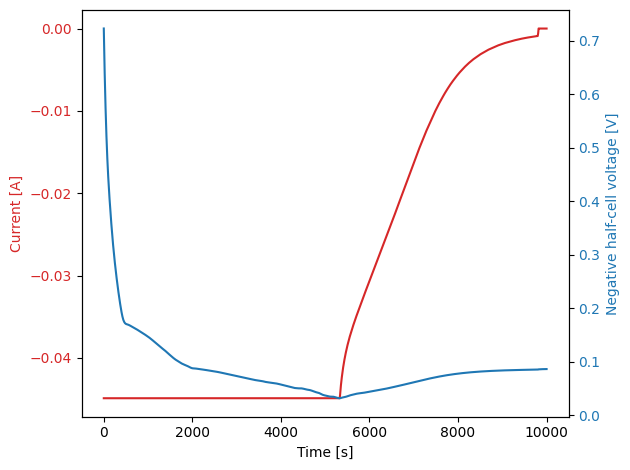

In [9]:
t = sol["Time [s]"].entries
V = sol["Terminal voltage [V]"].entries
Vn = -1*sol["Separator electrolyte potential [V]"].entries[10,:]
I = sol["Current [A]"].entries

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Current [A]', color=color)
ax1.plot(t, I, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Negative half-cell voltage [V]', color=color)  # we already handled the x-label with ax1
ax2.plot(t, Vn, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("/mnt/c/Users/sokane/pybamm_data/Fabian_SLP/Fabian_SLP_current_halfcell.png")
plt.show()

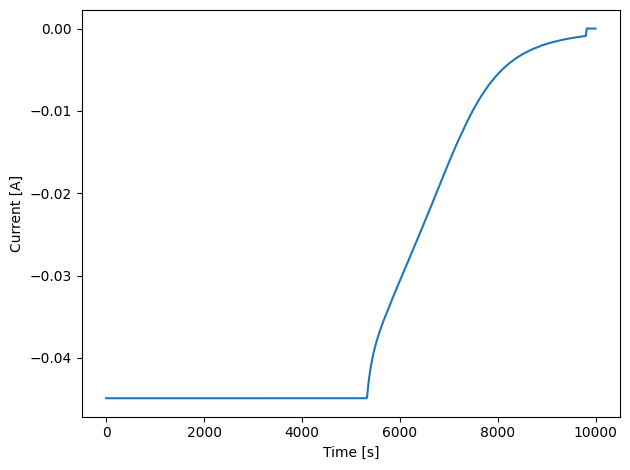

In [7]:
I = sol["Current [A]"].entries
plt.figure()
plt.plot(t,I)
plt.xlabel("Time [s]")
plt.ylabel("Current [A]")
plt.show()